<a href="https://colab.research.google.com/github/tienhungw/baitap5/blob/master/ThoigiantrungbinhsudungMXH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Cài đặt môi trường
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
# Đọc file Excel
file = "KhaoSatThoiGianSuDungMXH.xlsx"
col = "Trung bình thời gian sử dụng MXH một ngày (giờ)"

df = pd.read_excel(file)
print("Kích thước dữ liệu ban đầu:", df.shape)
display(df.head())
print(df[col].describe())
print("Số missing:", df[col].isna().sum())


Kích thước dữ liệu ban đầu: (110, 7)


,Dấu thời gian,Họ và tên,Tuổi của bạn,Giới tính,Nghề nghiệp,Trung bình thời gian sử dụng MXH một ngày (giờ),Mạng xã hội thường dùng nhất
0,21/09/2025 02:17:08,Nguyễn Thị Hoài,21,Nữ,Lao động tự do,2.0,Tiktok
1,21/09/2025 07:33:37,Trần Đức Dũng,21,Nam,Sinh viên,7.0,Youtube
2,21/09/2025 08:03:21,Nguyễn Thị Hoà,21,Nữ,Sinh viên,10.0,Tiktok
3,21/09/2025 08:12:19,Nguyễn Thị Lan Anh,23,Nữ,Nhân viên văn phòng,6.0,Facebook
4,21/09/2025 08:23:40,Nguyễn Thị Huế,21,Nữ,Sinh viên,8.5,Tiktok


count    110.000000
mean       4.122727
std        2.615398
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       18.000000
Name: Trung bình thời gian sử dụng MXH một ngày (giờ), dtype: float64
Số missing: 0


In [5]:
# Chuẩn hoá & làm sạch dữ liệu
df[col] = pd.to_numeric(df[col], errors="coerce")
df = df[(df[col].isna()) | ((df[col] >= 0) & (df[col] <= 24))]


In [6]:
# Xử lý missing (giá trị khuyết thiếu)
missing_before = df[col].isna().sum()
median_val = df[col].median()
df[col].fillna(median_val, inplace=True)

df["zscore"] = (df[col] - df[col].mean()) / df[col].std(ddof=1)
print(df[["zscore"]].head)


<bound method NDFrame.head of        zscore
0   -0.811627
1    1.100128
2    2.247181
3    0.717777
4    1.673655
..        ...
105  1.864830
106  1.100128
107 -0.811627
108 -0.046925
109  0.717777

[110 rows x 1 columns]>


/tmp/ipython-input-3925736640.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [7]:
# Phát hiện ngoại lệ (outlier)
col = "Trung bình thời gian sử dụng MXH một ngày (giờ)"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower) | (df[col] > upper)]

print("Q1 =", Q1)
print("Q3 =", Q3)
print("IQR =", IQR)
print("Ngưỡng dưới =", lower)
print("Ngưỡng trên =", upper)
print("Số ngoại lệ =", len(outliers))
print("Một số giá trị ngoại lệ:")
print(outliers[[col]].head())


Q1 = 2.0
Q3 = 5.0
IQR = 3.0
Ngưỡng dưới = -2.5
Ngưỡng trên = 9.5
Số ngoại lệ = 3
Một số giá trị ngoại lệ:
    Trung bình thời gian sử dụng MXH một ngày (giờ)
2                                              10.0
12                                             18.0
50                                             12.0


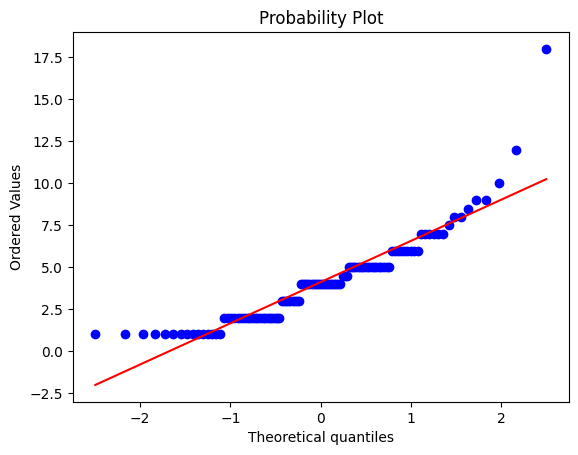

In [8]:
# Kiểm tra phân phối
stats.probplot(df[col], dist="norm", plot=plt)
sh_stat, sh_p = stats.shapiro(df[col]) if len(df[col]) <= 5000 else (None, None)


In [9]:
# Khoảng tin cậy 95% cho trung bình (dùng t-distribution)
col = "Trung bình thời gian sử dụng MXH một ngày (giờ)"

n = df.shape[0]                                # kích thước mẫu
xbar = df[col].mean()                          # trung bình mẫu
s2 = df[col].var(ddof=1)                       # phương sai hiệu chỉnh
s = np.sqrt(s2)                                # độ lệch chuẩn mẫu
se = s / np.sqrt(n)                            # sai số chuẩn

alpha = 0.05
dfree = n - 1
t_crit = stats.t.ppf(1 - alpha/2, dfree)       # giá trị tới hạn t
ci_lower = xbar - t_crit * se
ci_upper = xbar + t_crit * se

print("Kích thước mẫu n =", n)
print("Trung bình mẫu =", round(xbar, 4))
print("Phương sai hiệu chỉnh (s^2) =", round(s2, 4))
print("Độ lệch chuẩn mẫu (s) =", round(s, 4))
print("Sai số chuẩn (SE) =", round(se, 6))
print(f"95% CI cho trung bình: [{ci_lower:.4f}, {ci_upper:.4f}] (t_crit = {t_crit:.4f})")

Kích thước mẫu n = 110
Trung bình mẫu = 4.1227
Phương sai hiệu chỉnh (s^2) = 6.8403
Độ lệch chuẩn mẫu (s) = 2.6154
Sai số chuẩn (SE) = 0.249368
95% CI cho trung bình: [3.6285, 4.6170] (t_crit = 1.9820)


In [10]:
# Kiểm định giả thuyết (1-sample t-test)
col = "Trung bình thời gian sử dụng MXH một ngày (giờ)"
mu0 = 3   # giá trị giả thuyết H0

# Thống kê mẫu
n = df.shape[0]
xbar = df[col].mean()
s = df[col].std(ddof=1)
se = s / np.sqrt(n)
dfree = n - 1

# Thống kê t
t_stat = (xbar - mu0) / se

# p-value cho 1 phía (μ > mu0)
p_value_one = 1 - stats.t.cdf(t_stat, dfree)

# p-value cho 2 phía (so sánh μ ≠ mu0, tham khảo)
p_value_two = (1 - stats.t.cdf(abs(t_stat), dfree)) * 2

print("Giả thuyết H0: μ =", mu0)
print("Giả thuyết H1: μ >", mu0)
print("Trung bình mẫu =", round(xbar,4))
print("t-stat =", round(t_stat,4))
print("p-value (one-sided, H1: μ > mu0) =", p_value_one)
print("p-value (two-sided, tham khảo) =", p_value_two)

# Kết luận với alpha = 0.05
alpha = 0.05
if p_value_one < alpha:
    print("Bác bỏ H0, chấp nhận H1: Thời gian trung bình > 4 giờ/ngày.")
else:
    print("Chưa đủ bằng chứng để bác bỏ H0.")

Giả thuyết H0: μ = 3
Giả thuyết H1: μ > 3
Trung bình mẫu = 4.1227
t-stat = 4.5023
p-value (one-sided, H1: μ > mu0) = 8.463464837071832e-06
p-value (two-sided, tham khảo) = 1.6926929674143665e-05
Bác bỏ H0, chấp nhận H1: Thời gian trung bình > 4 giờ/ngày.
